# <font color=#025dfa> Multiple Linear Regression

In [2]:
#pip install xgboost

In [3]:
#pip install nltk

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore') 

from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler as Scaler
import statsmodels.formula.api as sm

In [5]:
pd.set_option('display.max_columns', None) #verileri genişletmeye yarıyor
pd.set_option('display.max_rows', None)

In [6]:
df=pd.read_csv('advertising.csv')

## <font color=#d707f2> EDA Exploratory Data Analsis

In [8]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.sample(5)

,TV,Radio,Newspaper,Sales
6,57.5,32.8,23.5,11.8
126,7.8,38.9,50.6,6.6
82,75.3,20.3,32.5,11.3
14,204.1,32.9,46.0,19.0
51,100.4,9.6,3.6,10.7


In [10]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [11]:
df.shape

(200, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
df.isnull().sum().sort_values(ascending=True)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


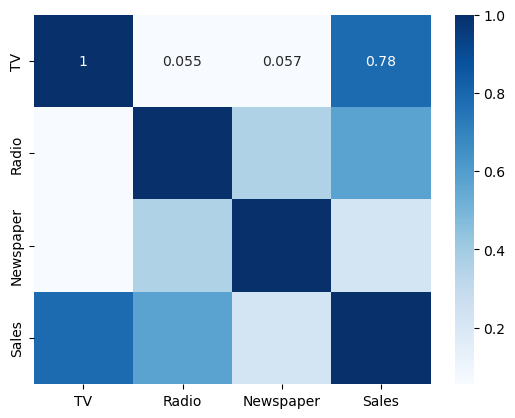

In [16]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [17]:
abs(df.corr(numeric_only=True)['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

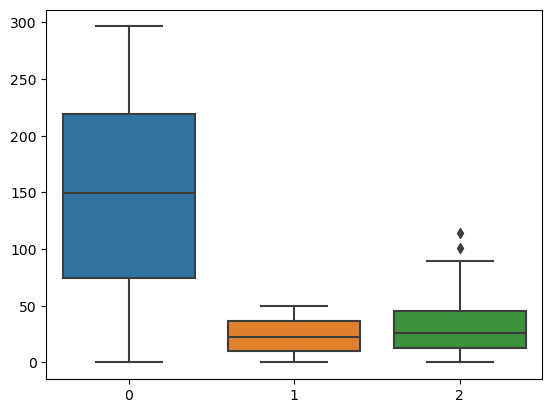

In [18]:
sns.boxplot([df['TV'],df['Radio'],df['Newspaper']]);

In [19]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## <font color=#e82709> Feature Engineering

### <font color=#1cfc03> Outlier

In [22]:
outliers=df.quantile(q=.97, numeric_only=True)

In [23]:
df=df[(df['Newspaper']<outliers['Newspaper'])]

### <font color='#0975e8'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzetmaye Başladık

In [25]:
df.isnull().sum().sort_values(ascending=False)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

sns.countplot(x=df[])
plt.xticks(rotation=90);

df[].value_counts().plot.pie(autopct='%1.1f%%',explode=[,,,]);

sns.distplot(x=df[])
plt.xticks(rotation=90);

sns.histplot(x=df[]);

sns.boxplot(x='',y='',data=df);
plt.xticks(rotation=90);

#### <font color=#2da6f7> TV'e bakıyoruz

In [29]:
df['TV'].value_counts()

TV
184.9    2
199.8    2
197.6    2
76.4     2
109.8    2
177.0    2
240.1    2
237.4    2
222.4    2
17.2     2
75.5     1
219.8    1
7.8      1
80.2     1
220.3    1
59.6     1
94.2     1
0.7      1
265.2    1
8.4      1
36.9     1
229.5    1
48.3     1
25.6     1
273.7    1
43.0     1
73.4     1
220.5    1
104.6    1
96.2     1
87.2     1
123.1    1
243.2    1
283.6    1
238.2    1
137.9    1
25.0     1
90.4     1
13.1     1
255.4    1
225.8    1
241.7    1
175.7    1
209.6    1
78.2     1
75.1     1
139.2    1
19.4     1
141.3    1
18.8     1
224.0    1
140.3    1
38.0     1
39.5     1
166.8    1
168.4    1
276.9    1
149.7    1
248.4    1
170.2    1
276.7    1
165.6    1
156.6    1
218.5    1
164.5    1
56.2     1
287.6    1
253.8    1
205.0    1
139.5    1
191.1    1
286.0    1
18.7     1
19.6     1
50.0     1
44.7     1
131.7    1
280.7    1
121.0    1
187.9    1
187.8    1
4.1      1
93.9     1
149.8    1
11.7     1
172.5    1
284.3    1
38.2     1
85.7     1
188.4    1
163.5  

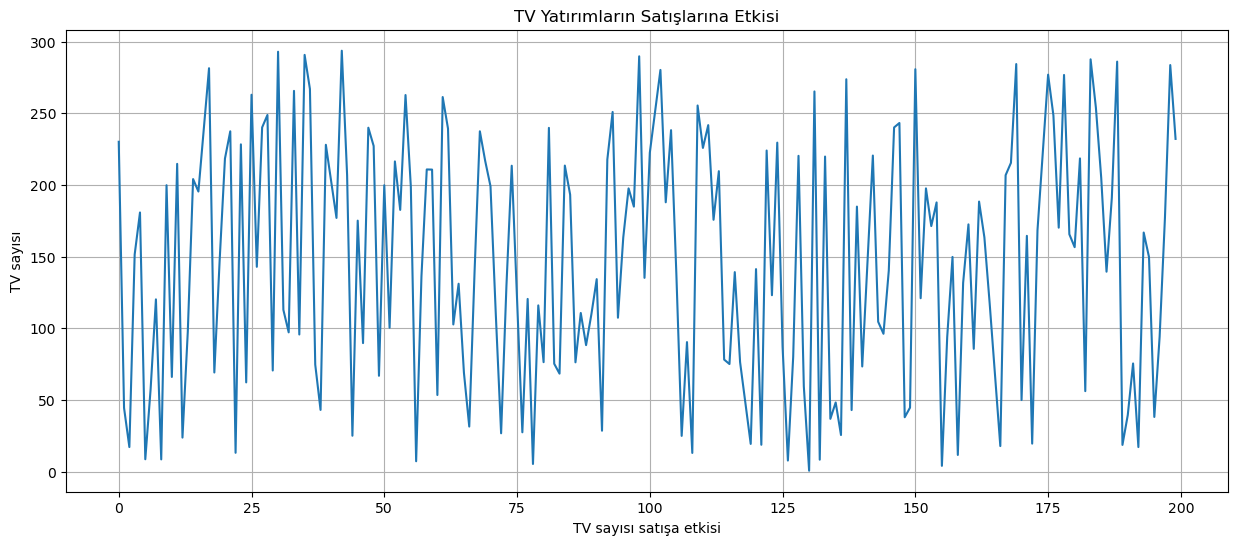

In [30]:
plt.figure(figsize=(15,6))
plt.plot(df['TV'])
plt.xlabel('TV sayısı satışa etkisi')
plt.ylabel('TV sayısı')
plt.title('TV Yatırımların Satışlarına Etkisi')
plt.grid(True)

#### <font color=#2da6f7> Radio'ya bakıyoruz

In [32]:
df['Radio'].value_counts()

Radio
4.1     3
5.7     3
49.0    2
39.6    2
18.1    2
8.4     2
43.9    2
3.5     2
43.0    2
18.4    2
11.6    2
27.5    2
27.7    2
49.4    2
4.9     2
24.6    2
33.5    2
14.3    2
13.9    2
9.3     2
1.5     2
41.7    2
2.6     2
2.1     2
26.7    2
42.0    2
48.9    2
10.8    2
16.0    2
37.8    1
12.0    1
27.2    1
38.6    1
47.0    1
39.0    1
2.9     1
32.3    1
0.0     1
38.9    1
0.4     1
26.9    1
8.2     1
38.0    1
15.4    1
20.6    1
46.8    1
35.0    1
0.8     1
26.8    1
21.7    1
2.4     1
34.6    1
25.9    1
11.8    1
28.9    1
23.3    1
17.0    1
10.6    1
20.1    1
7.1     1
3.4     1
30.2    1
7.8     1
2.3     1
10.0    1
5.4     1
21.3    1
45.1    1
28.7    1
12.1    1
41.1    1
35.6    1
3.7     1
20.9    1
23.6    1
33.2    1
5.2     1
14.8    1
1.9     1
7.3     1
40.3    1
25.8    1
11.0    1
39.7    1
21.1    1
43.5    1
1.3     1
36.9    1
35.8    1
36.8    1
14.7    1
37.6    1
0.3     1
47.8    1
46.4    1
43.8    1
16.7    1
27.1    1
28.3    1
17.4

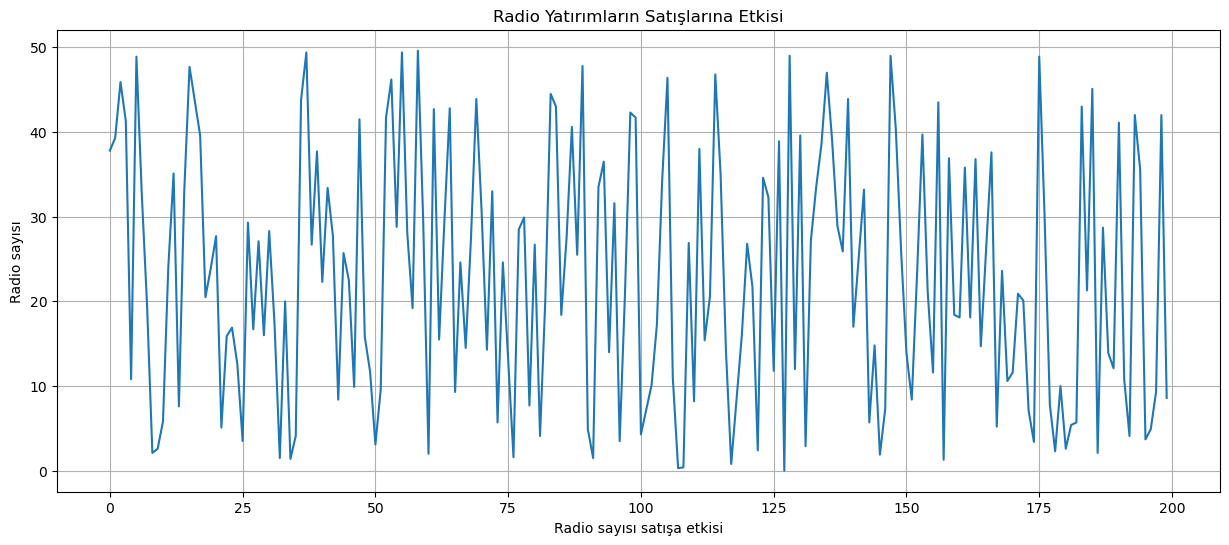

In [33]:
plt.figure(figsize=(15,6))
plt.plot(df['Radio'])
plt.xlabel('Radio sayısı satışa etkisi')
plt.ylabel('Radio sayısı')
plt.title('Radio Yatırımların Satışlarına Etkisi')
plt.grid(True)

#### <font color=#2da6f7> Newspaper'a bakıyoruz

In [35]:
df['Newspaper'].value_counts()

Newspaper
9.3     3
25.6    3
8.7     3
34.6    2
13.1    2
22.9    2
6.4     2
30.0    2
7.4     2
8.5     2
38.7    2
31.6    2
18.3    2
3.6     2
21.4    2
37.7    2
22.3    2
14.2    2
29.7    2
23.2    2
6.0     2
23.5    2
52.9    2
59.0    2
45.1    2
46.2    1
65.6    1
5.5     1
43.0    1
2.1     1
1.7     1
59.7    1
20.5    1
12.9    1
37.9    1
56.5    1
43.1    1
50.4    1
3.2     1
9.2     1
2.4     1
10.7    1
50.6    1
34.5    1
52.7    1
38.9    1
25.9    1
74.2    1
14.8    1
12.4    1
15.6    1
34.4    1
69.2    1
9.0     1
71.8    1
41.8    1
20.3    1
35.2    1
23.7    1
17.6    1
8.3     1
27.4    1
19.6    1
17.0    1
26.6    1
18.2    1
3.7     1
23.4    1
5.8     1
13.8    1
8.1     1
12.8    1
47.4    1
44.3    1
50.5    1
11.9    1
20.6    1
17.9    1
37.0    1
48.7    1
9.5     1
5.7     1
24.3    1
18.4    1
45.2    1
30.7    1
49.3    1
5.4     1
21.6    1
19.4    1
57.6    1
5.3     1
51.4    1
49.8    1
36.8    1
12.6    1
40.8    1
43.2    1
38.6    1


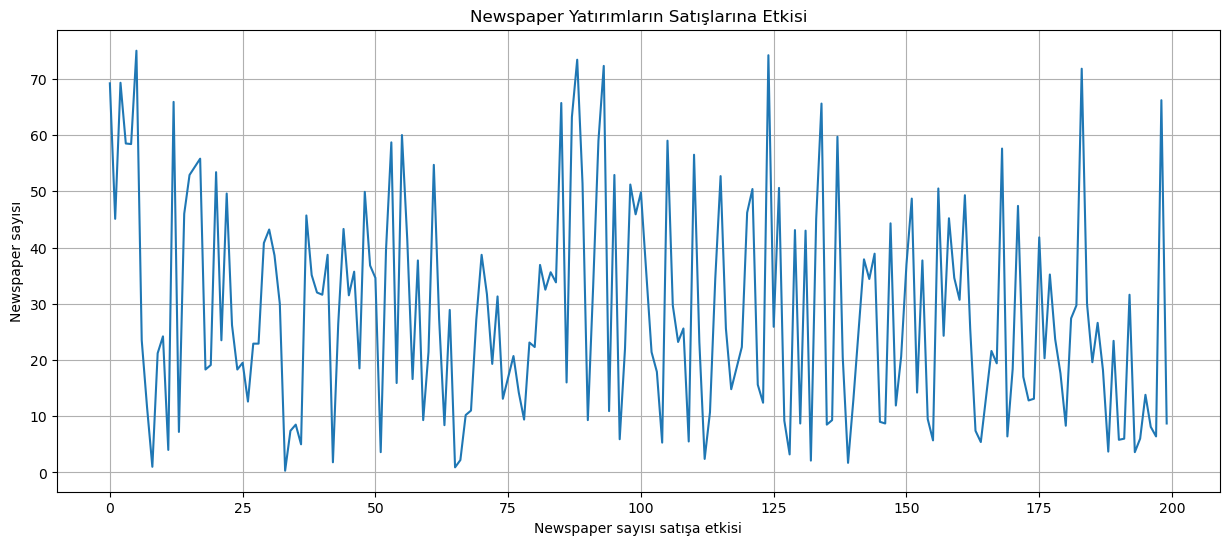

In [36]:
plt.figure(figsize=(15,6))
plt.plot(df['Newspaper'])
plt.xlabel('Newspaper sayısı satışa etkisi')
plt.ylabel('Newspaper sayısı')
plt.title('Newspaper Yatırımların Satışlarına Etkisi')
plt.grid(True)

In [37]:
df.isnull().sum().sort_values(ascending=False)

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         194 non-null    float64
 1   Radio      194 non-null    float64
 2   Newspaper  194 non-null    float64
 3   Sales      194 non-null    float64
dtypes: float64(4)
memory usage: 7.6 KB


## <font color=#fa7efc> Modelling

In [40]:
l=LinearRegression()

In [41]:
x=df[['TV','Radio','Newspaper']]
y=df[['Sales']]

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [43]:
x=pd.get_dummies(x,drop_first=True)

In [44]:
l.fit(x_train,y_train)
tahmin=l.predict(x_test)
mean_squared_error(y_test,tahmin)**.5

1.6931269371410205

In [45]:
r2_score(y_test,tahmin)

0.8995263574958908

In [46]:
tahmin

array([[ 9.07940586],
       [23.24085068],
       [14.34784607],
       [24.07264004],
       [20.90507507],
       [10.4009474 ],
       [ 8.62763992],
       [20.73046899],
       [12.99758516],
       [15.12847711],
       [12.20943996],
       [14.16197894],
       [20.62938718],
       [12.8097406 ],
       [ 7.54685681],
       [ 8.06904619],
       [17.80883901],
       [12.13130179],
       [12.87587659],
       [14.91158427],
       [ 6.8309274 ],
       [ 9.82227924],
       [12.09238936],
       [ 9.14724542],
       [17.11813827],
       [ 6.94674032],
       [18.86807349],
       [16.42403594],
       [11.5445579 ],
       [20.07551568],
       [13.85029345],
       [13.72557887],
       [15.83978019],
       [16.27931941],
       [15.95906854],
       [24.60515204],
       [18.25308704],
       [13.94096447],
       [17.27164756]])

In [47]:
df['Sales'].mean()

13.981958762886597

In [48]:
df['TV'].mean(),df['Radio'].mean(),df['Newspaper'].mean()

(146.77061855670104, 22.992268041237114, 28.695360824742266)

In [49]:
l.coef_

array([[0.04564026, 0.17648327, 0.00511514]])

In [50]:
l.intercept_

array([3.12351933])

In [51]:
satis=3.12+0.045*146+0.17*22+0.00*28

In [53]:
model=sm.ols(formula='Sales~TV+Radio+Newspaper',data=df).fit()
coef=model.params
fit=coef[0]+coef[1]*df.TV+coef[2]*df.Radio+coef[3]*df.Newspaper
res=df.Sales-fit
print(fit)
print(res)
print(model.summary())

0      20.663858
1      12.427450
2      12.493599
3      17.709450
4      13.344110
5      12.685060
6      11.737598
7      12.086748
8       3.708615
9      12.561285
10      7.087037
11     17.183508
12     10.765712
13      8.798883
14     18.494038
15     20.884489
17     23.292001
18      9.955894
19     14.145900
20     18.195968
21     14.745667
22      6.646327
23     16.544486
24      8.166240
25     15.594249
26     14.934420
27     17.033627
28     19.372181
29      9.248593
30     21.665097
31     11.427328
32      7.716289
33     18.739989
34      7.559401
35     16.936755
36     23.259777
37     15.689744
38      9.978987
39     20.434470
40     16.396476
41     17.332198
42     21.456657
43     13.983833
44      8.998838
45     15.187242
46      8.962015
47     21.643821
48     16.362346
49      8.264625
50     12.696183
51      9.293264
52     20.677623
53     20.040025
54     20.300325
55     21.383250
56      8.631670
57     12.755265
58     21.892831
59     18.0454

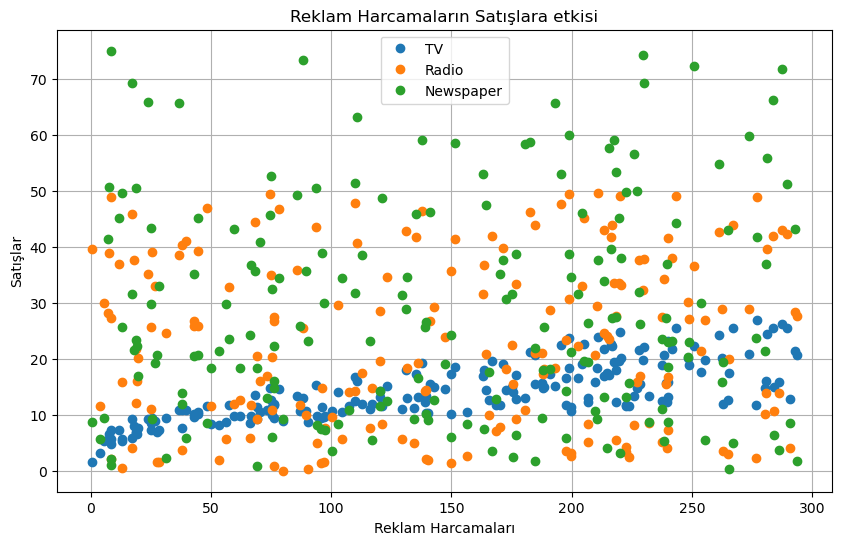

In [55]:
tv=df['TV']
radio=df['Radio']
newspaper=df['Newspaper']
sales=df['Sales']

plt.figure(figsize=(10,6))

plt.plot(tv,sales,'o',label='TV')
plt.plot(tv,radio,'o',label='Radio')
plt.plot(tv,newspaper,'o',label='Newspaper')

plt.xlabel('Reklam Harcamaları')
plt.ylabel('Satışlar')
plt.title('Reklam Harcamaların Satışlara etkisi')

plt.legend() #hangi rengin yeye tanımlı olduğunu gösteriyor
plt.grid(True); # arka plana; sayılarla keşisen çizgiler koyuyor

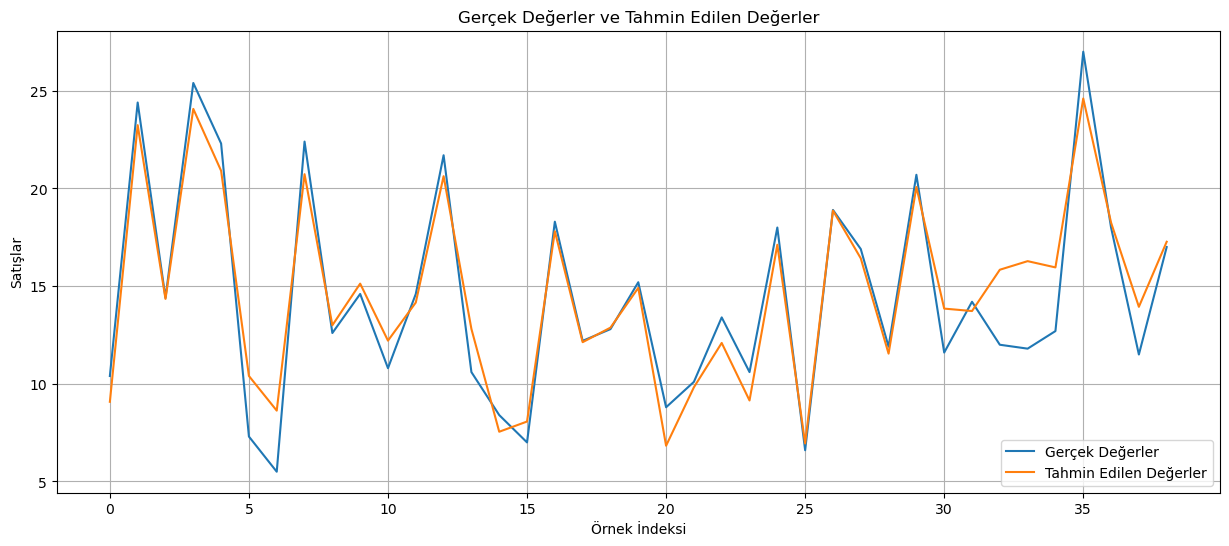

In [57]:
plt.figure(figsize=(15,6))

plt.plot(range(len(y_test)),y_test,label='Gerçek Değerler')
plt.plot(range(len(y_test)),tahmin,label='Tahmin Edilen Değerler')

plt.xlabel('Örnek İndeksi')
plt.ylabel('Satışlar')
plt.title('Gerçek Değerler ve Tahmin Edilen Değerler')

plt.legend()
plt.grid(True)